Curso:<br>
https://cursos.alura.com.br/course/customizacao-matplot

In [1]:
from datetime import datetime
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monitoramento_tempo.csv')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [4]:
df['data'] = pd.to_datetime(df['data'])

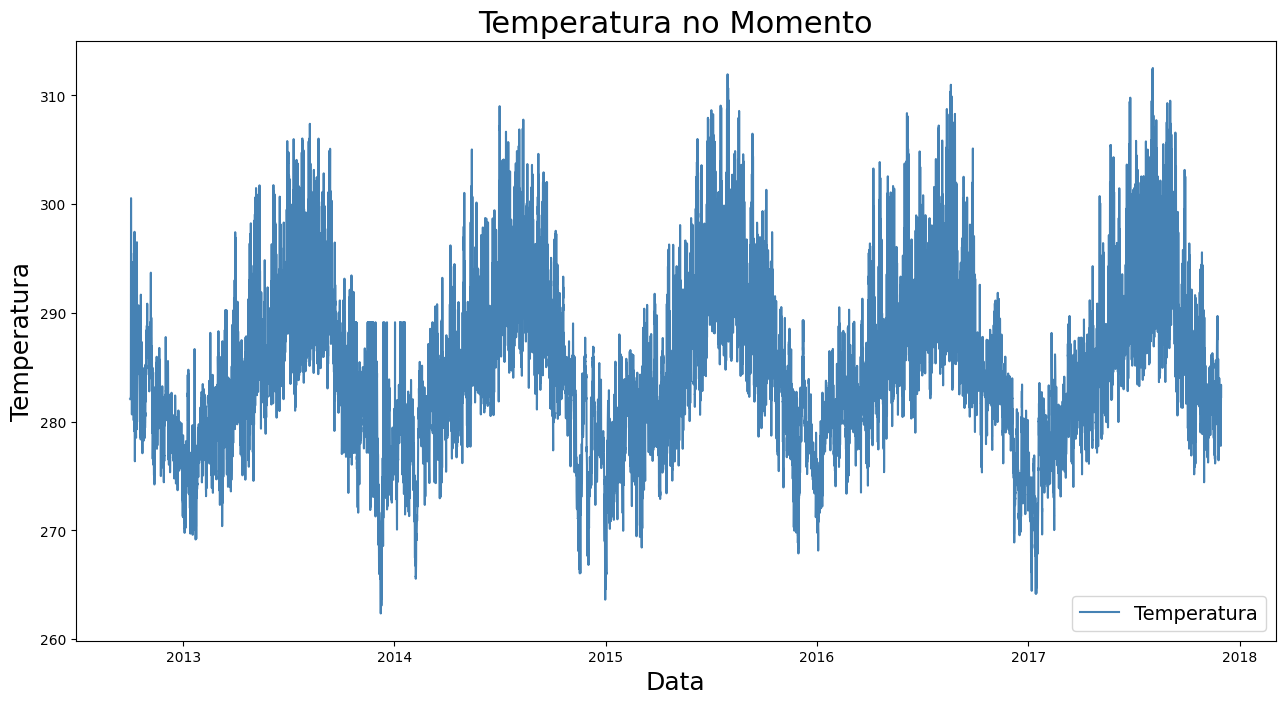

In [5]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df['data'], df['temperatura'], color = 'steelblue')
ax.set_title('Temperatura no Momento', fontsize = 22)
ax.set_ylabel('Temperatura', fontsize = 18)
ax.set_xlabel('Data', fontsize = 18)

_ = ax.legend(['Temperatura'], loc = 'lower right', fontsize = 14)

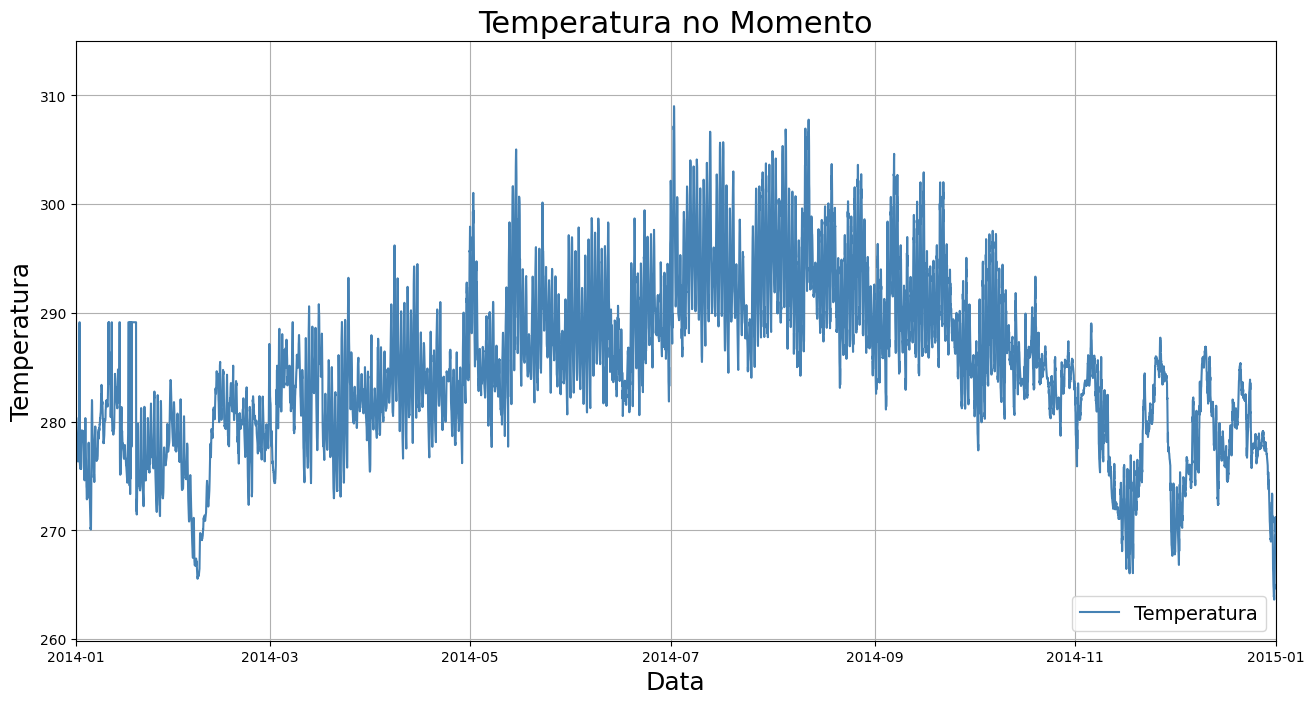

In [6]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df['data'], df['temperatura'], color = 'steelblue')

ax.set_xlim(datetime(2014, 1, 1), datetime(2015,1 ,1))

ax.set_title('Temperatura no Momento', fontsize = 22)
ax.set_ylabel('Temperatura', fontsize = 18)
ax.set_xlabel('Data', fontsize = 18)
ax.legend(['Temperatura'], loc = 'lower right', fontsize = 14)
ax.grid(True)

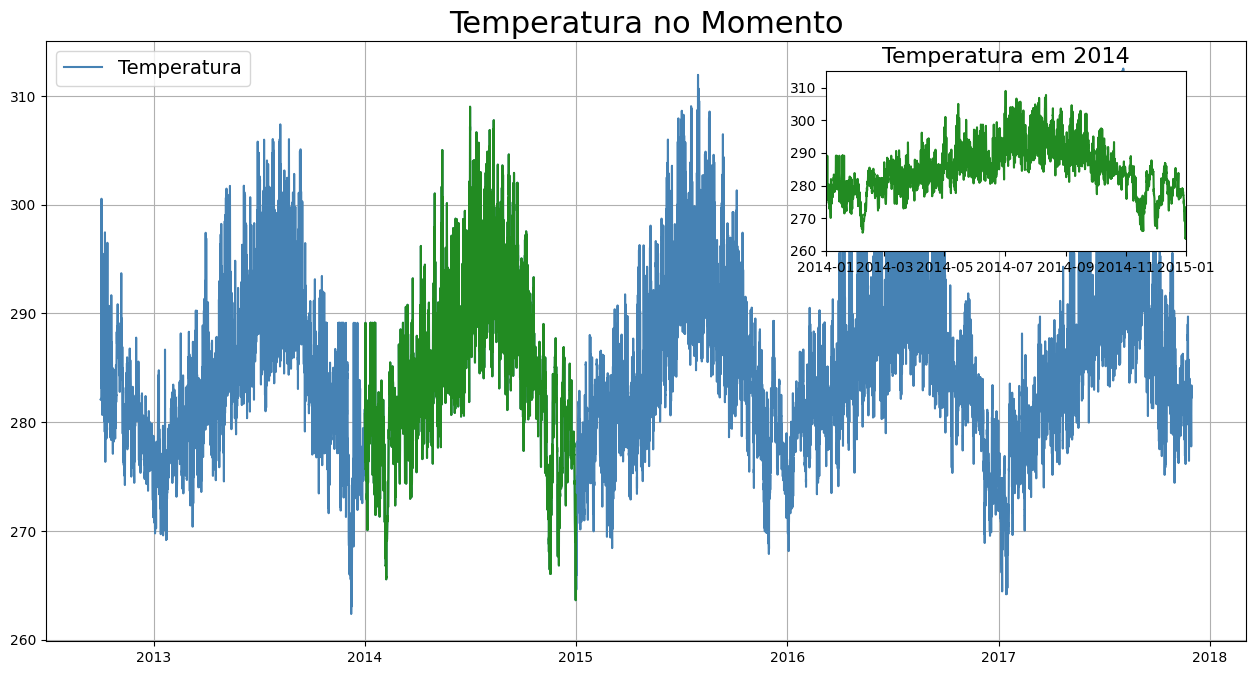

In [7]:
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.65, 0.65, 0.3, 0.3])

ax1.set_title('Temperatura no Momento', fontsize = 22)
ax1.plot(df['data'], df['temperatura'], color = 'steelblue')
ax1.legend(['Temperatura'], loc = 'best', fontsize = 14)
ax1.grid(True)

ax2.set_title('Temperatura em 2014', fontsize = 16)
ax2.plot(df['data'], df['temperatura'], color = 'forestgreen')
ax2.set_xlim(datetime(2014, 1, 1), datetime(2015,1 ,1))

mask = (df['data'] > datetime(2014, 1, 1))\
        & (df['data'] < datetime(2015, 1, 1))

_ = ax1.plot(df.loc[mask]['data'], df.loc[mask]['temperatura'],
             color = 'forestgreen')

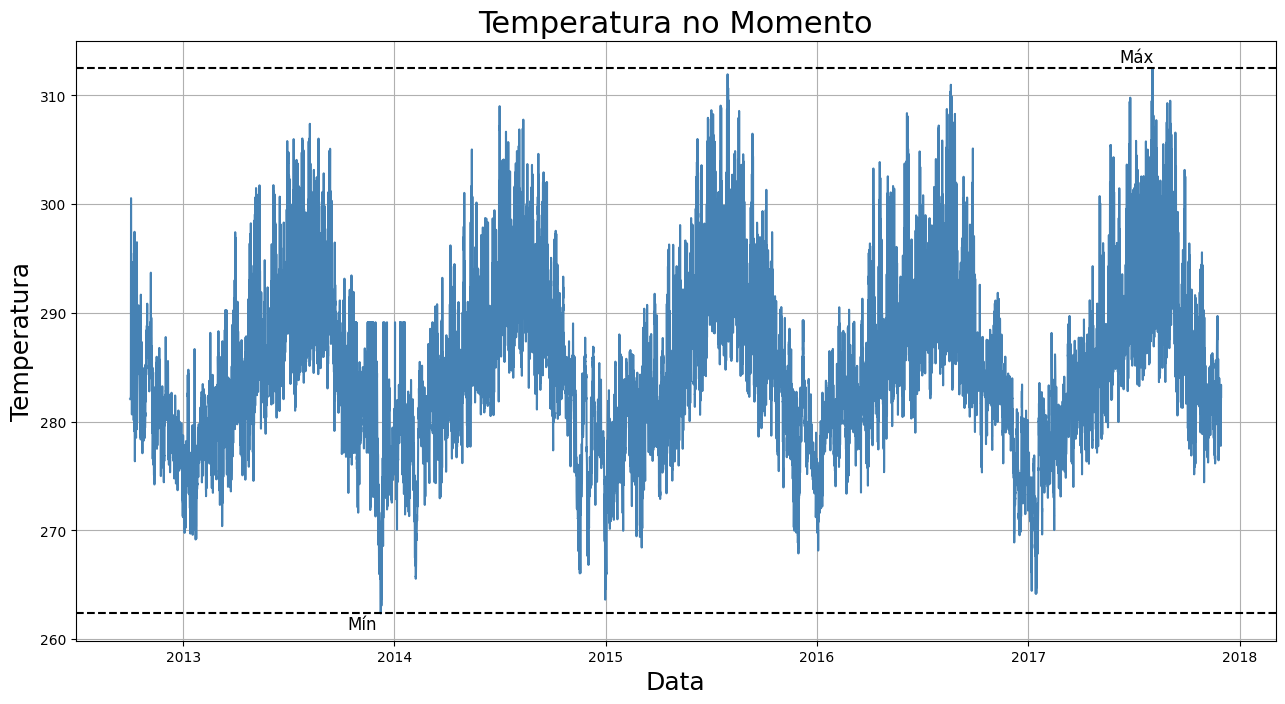

In [8]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df['data'], df['temperatura'], color = 'steelblue')
ax.set_title('Temperatura no Momento', fontsize = 22)
ax.set_ylabel('Temperatura', fontsize = 18)
ax.set_xlabel('Data', fontsize = 18)
ax.grid(True)

x1 = df['data'][df['temperatura'].idxmax() - 1400]
y1 = max(df['temperatura'])
ax.annotate('Máx', xy = (x1, y1 + 0.5), fontsize = 12)

x2 = df['data'][df['temperatura'].idxmin() - 1400]
y2 = min(df['temperatura'])
ax.annotate('Mín', xy = (x2, y2 - 1.5), fontsize = 12)

_ = ax.axhline(y2, color = 'k', linestyle = '--')
_ = ax.axhline(y1, color = 'k', linestyle = '--')

In [9]:
temp_dia_semana = df.groupby('dia_da_semana')['temperatura'].mean()

dias_semana = ['Domingo', 'Segunda', 'Terça', 'Quarta',
               'Quinta', 'Sexta', 'Sábado']

temp_dia_semana = temp_dia_semana[dias_semana]

temp_dia_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

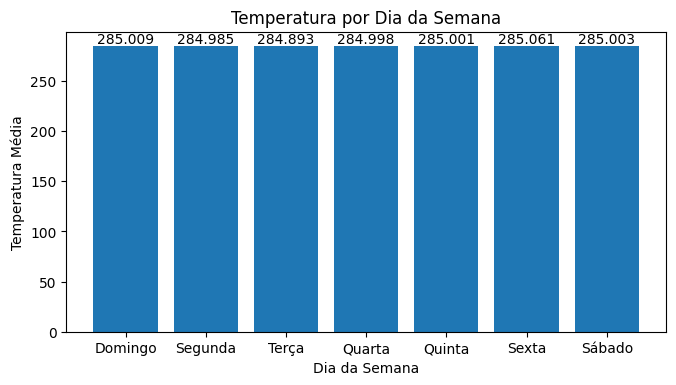

In [10]:
fig = plt.figure(figsize = (6, 3))
ax = fig.add_axes([0, 0, 1, 1])

idx = range(len(temp_dia_semana))

ax.bar(idx, temp_dia_semana, color = 'steelblue')
ax.set_title('Temperatura por Dia da Semana')
ax.set_xlabel('Dia da Semana')
ax.set_ylabel('Temperatura Média')
ax.set_xticks(idx)
ax.set_xticklabels(dias_semana)

_ = ax.bar_label(ax.bar(temp_dia_semana.index, temp_dia_semana.values))

In [11]:
df = pd.read_csv('iris.csv')

In [12]:
df.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


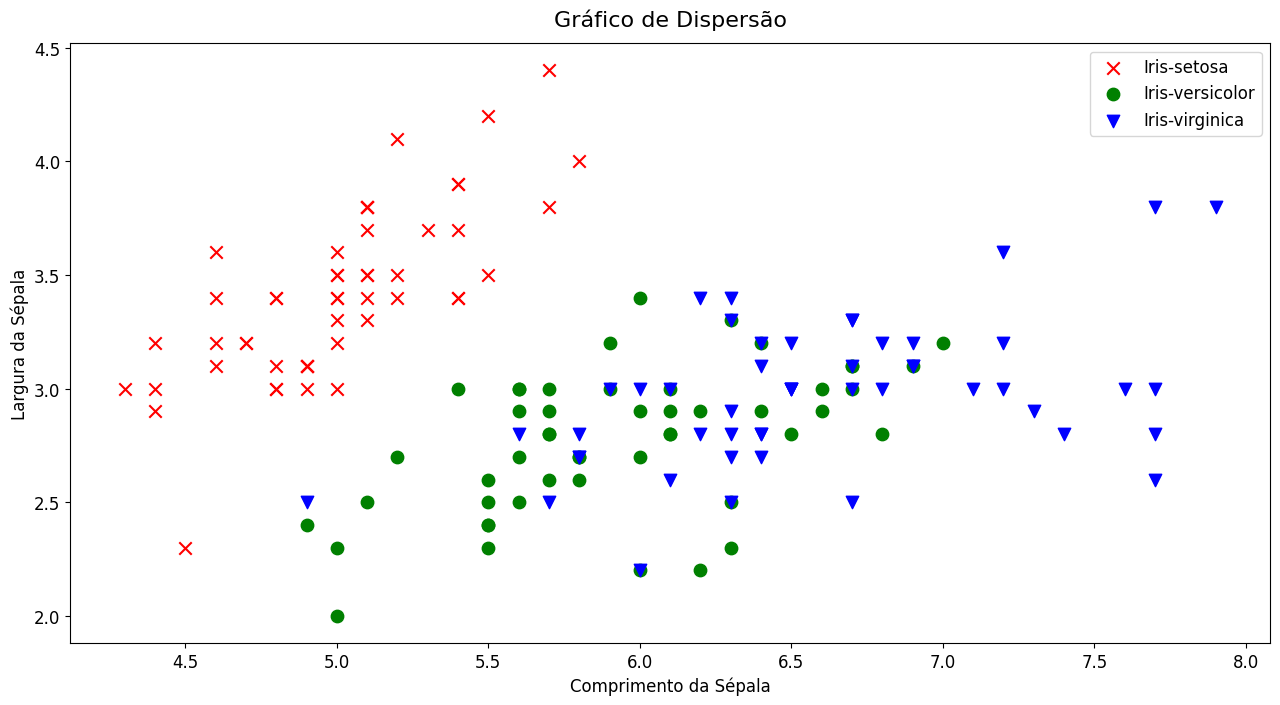

In [13]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])

cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
marcadores = {'Iris-setosa': 'x', 'Iris-versicolor': 'o',
              'Iris-virginica': 'v'}

for i in df['espécie'].unique():
    tmp = df[df['espécie'] == i]
    ax.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
               color = cores[i], marker = marcadores[i], s = 80)

ax.set_title('Gráfico de Dispersão', fontsize = 16, pad = 12)
ax.set_xlabel('Comprimento da Sépala', fontsize = 12)
ax.set_ylabel('Largura da Sépala', fontsize = 12)
ax.tick_params(labelsize = 12)
ax.legend(cores, fontsize = 12)

plt.show()

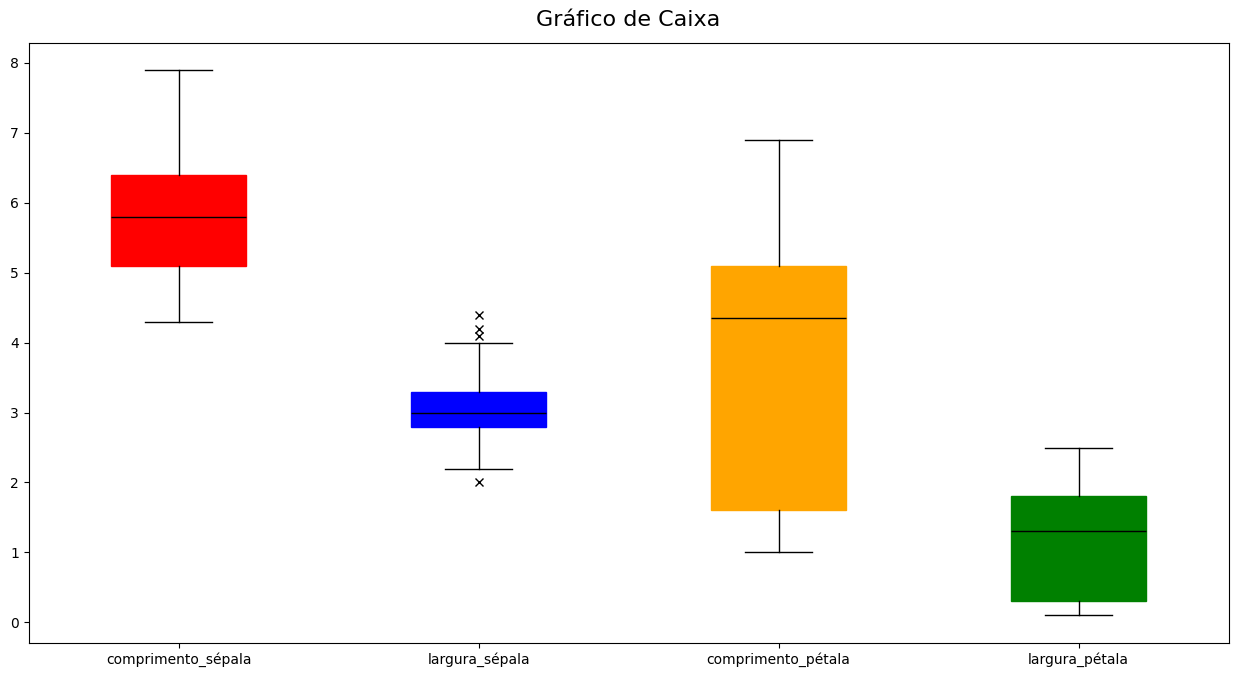

In [14]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])

cores = ['red', 'blue', 'orange', 'green']

caixas = ax.boxplot(df.drop('espécie', axis = 1), patch_artist = True)
ax.set_title('Gráfico de Caixa', fontsize = 16, pad = 12)
ax.set_xticklabels(df.drop('espécie', axis = 1).columns)

for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color = cor)

for outlier in caixas['fliers']:
    outlier.set(marker = 'x', markersize = 6)

for median in caixas['medians']:
    median.set_color('black')

plt.show()

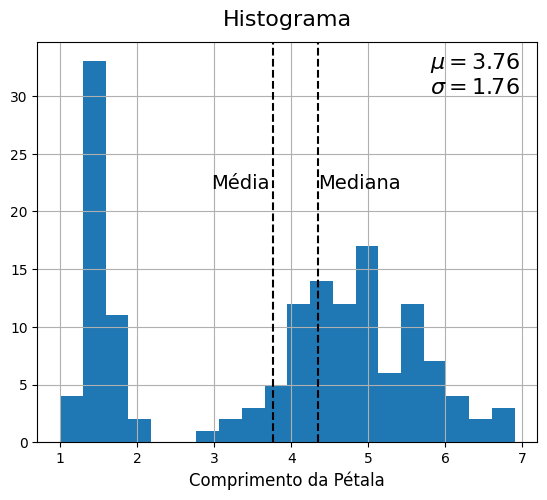

In [15]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_axes([0, 0, 1, 1])

mu = df['comprimento_pétala'].mean()
sigma = df['comprimento_pétala'].std()
md = df['comprimento_pétala'].median()

ax.hist(df['comprimento_pétala'], bins = 20)
ax.set_title('Histograma', fontsize = 16, pad = 12)
ax.set_xlabel('Comprimento da Pétala', fontsize = 12)
ax.grid(True)

ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
            xy = (5.8, 30.2), fontsize = 16)

ax.axvline(mu, color = 'k', linestyle = '--')
ax.annotate('Média', xy = (mu - 0.8, 22), fontsize = 14)

ax.axvline(md, color = 'k', linestyle = '--')
ax.annotate('Mediana', xy = (md, 22), fontsize = 14)

plt.show()

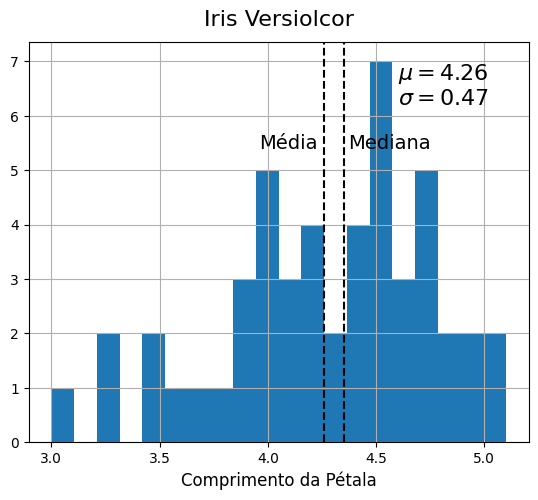

In [16]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_axes([0, 0, 1, 1])

df_iv = df[df['espécie'] == 'Iris-versicolor']

mu = df_iv['comprimento_pétala'].mean()
sigma = df_iv['comprimento_pétala'].std()
md = df_iv['comprimento_pétala'].median()

ax.hist(df_iv['comprimento_pétala'], bins = 20)
ax.set_title('Iris Versiolcor', fontsize = 16, pad = 12)
ax.set_xlabel('Comprimento da Pétala', fontsize = 12)
ax.grid(True)

ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
            xy = (4.6, 6.2), fontsize = 16)

ax.axvline(mu, color = 'k', linestyle = '--')
ax.annotate('Média', xy = (mu - 0.3, 5.4), fontsize = 14)

ax.axvline(md, color = 'k', linestyle = '--')
ax.annotate('Mediana', xy = (md + 0.02, 5.4), fontsize = 14)

fig.savefig('hist_iv', bbox_inches='tight')

plt.show()

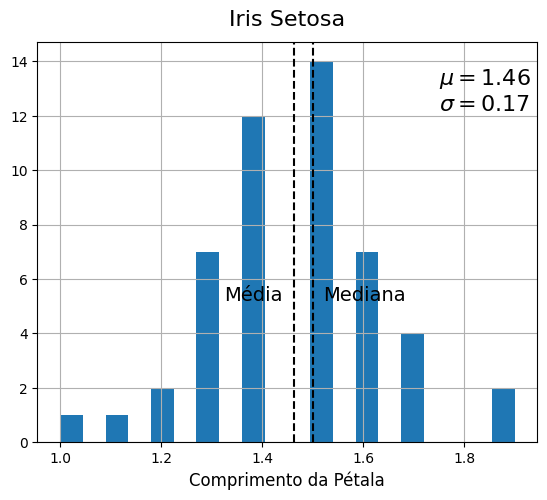

In [17]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_axes([0, 0, 1, 1])

df_is = df[df['espécie'] == 'Iris-setosa']

mu = df_is['comprimento_pétala'].mean()
sigma = df_is['comprimento_pétala'].std()
md = df_is['comprimento_pétala'].median()

ax.hist(df_is['comprimento_pétala'], bins = 20)
ax.set_title('Iris Setosa', fontsize = 16, pad = 12)
ax.set_xlabel('Comprimento da Pétala', fontsize = 12)
ax.grid(True)

ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
            xy = (1.75, 12.2), fontsize = 16)

ax.axvline(mu, color = 'k', linestyle = '--')
ax.annotate('Média', xy = (mu - 0.14, 5.2), fontsize = 14)

ax.axvline(md, color = 'k', linestyle = '--')
ax.annotate('Mediana', xy = (md + 0.02, 5.2), fontsize = 14)

fig.savefig('hist_is', bbox_inches='tight')

plt.show()

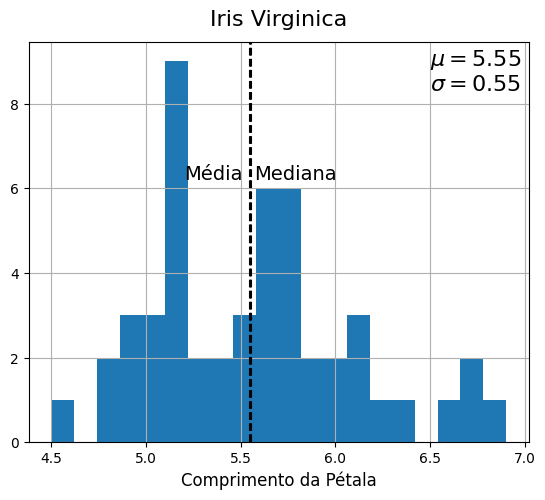

In [18]:
fig = plt.figure(figsize = (5, 4))
ax = fig.add_axes([0, 0, 1, 1])

df_ivc = df[df['espécie'] == 'Iris-virginica']

mu = df_ivc['comprimento_pétala'].mean()
sigma = df_ivc['comprimento_pétala'].std()
md = df_ivc['comprimento_pétala'].median()

ax.hist(df_ivc['comprimento_pétala'], bins = 20)
ax.set_title('Iris Virginica', fontsize = 16, pad = 12)
ax.set_xlabel('Comprimento da Pétala', fontsize = 12)
ax.grid(True)

ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
            xy = (6.5, 8.3), fontsize = 16)

ax.axvline(mu, color = 'k', linestyle = '--')
ax.annotate('Média', xy = (mu - 0.35, 6.2), fontsize = 14)

ax.axvline(md, color = 'k', linestyle = '--')
ax.annotate('Mediana', xy = (md + 0.02, 6.2), fontsize = 14)

fig.savefig('hist_ivc', bbox_inches='tight')

plt.show()

In [19]:
largura, altura = Image.open('hist_is.png').size
img_combinada = Image.new(size = (3 * largura, altura), mode = 'RGB')

intervalo = 0
for img in map(Image.open, ['hist_is.png', 'hist_iv.png', 'hist_ivc.png']):
    img_combinada.paste(img, (intervalo, 0))
    intervalo += largura 

img_combinada.save('hist_combinada.png')

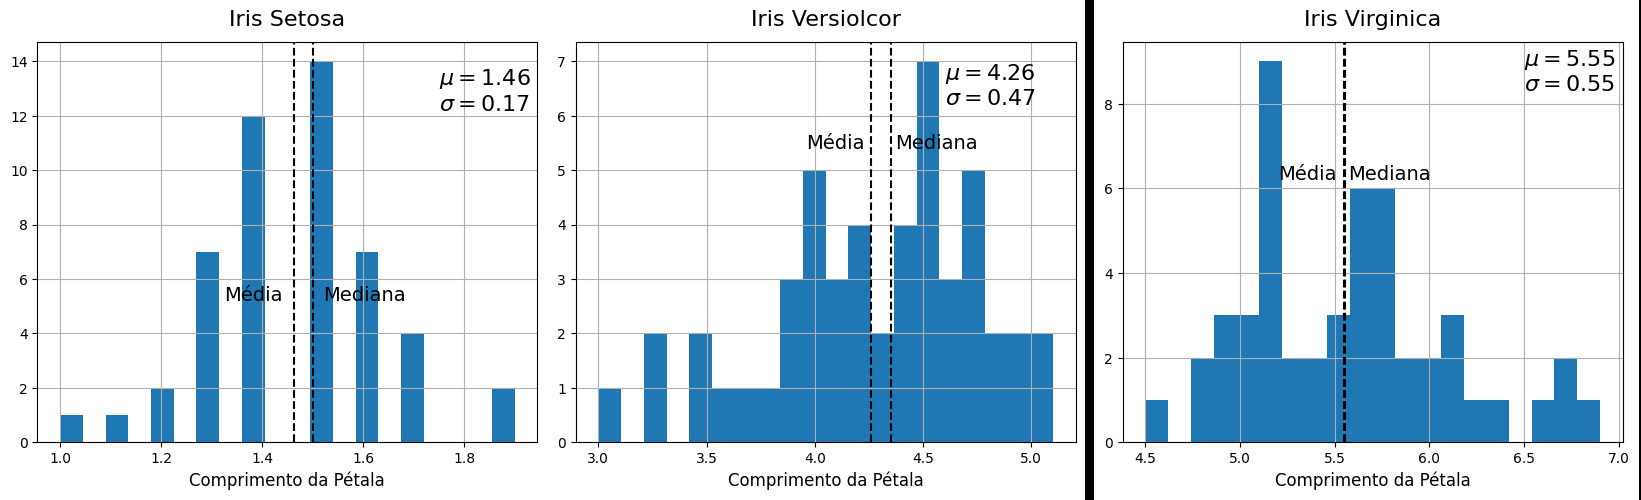

In [20]:
img_combinada